<a href="https://colab.research.google.com/github/jayshivankar/CNN/blob/main/Image_Class_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
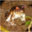

In [ ]:
x_train[0]

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
# for further use , we need to flatten the 2d array
y_train = y_train.reshape(-1,)  # -1 keeps rows size same,blank reduces 2d to 1d
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),  # Input layer
    layers.Dense(3000, activation='relu'),   # Hidden layers
    layers.Dense(3000, activation='relu') , # Hidden layers
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3113 - loss: 1.9245
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4253 - loss: 1.6421
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4546 - loss: 1.5483
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4783 - loss: 1.4861
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4951 - loss: 1.4388


In [ ]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4669 - loss: 1.4953


[1.4968080520629883, 0.4641000032424927]

In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3394 - loss: 1.7941
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5803 - loss: 1.1898
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6358 - loss: 1.0367
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6722 - loss: 0.9395
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6990 - loss: 0.8708
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7162 - loss: 0.8130
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7337 - loss: 0.7679
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7508 - loss: 0.7200
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7631 - loss: 0.6877
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7725 - loss: 0.6567


In [ ]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7063 - loss: 0.8821


[0.8818587064743042, 0.7049999833106995]

In [ ]:
y_test = y_test.reshape(-1,)


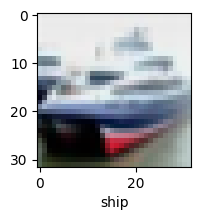

In [ ]:
plot_sample(x_test,y_test,1)

In [ ]:
y_pred = ann.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(8), np.int64(4)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.29      0.41      1000
           1       0.66      0.58      0.62      1000
           2       0.30      0.53      0.38      1000
           3       0.33      0.36      0.34      1000
           4       0.36      0.43      0.39      1000
           5       0.34      0.47      0.40      1000
           6       0.67      0.27      0.39      1000
           7       0.60      0.50      0.54      1000
           8       0.56      0.68      0.62      1000
           9       0.62      0.53      0.57      1000

    accuracy                           0.46     10000
   macro avg       0.52      0.46      0.47     10000
weighted avg       0.52      0.46      0.47     10000

